In [1]:
%matplotlib inline
#%matplotlib notebook
%reload_ext autoreload
%autoreload 2

# Measuring Spatiotemporal Civil War Dimensions Using Community-Based Dynamic Network Representation (CoDNet)

## How to use it and examples 

This is a notebook showing the code of the proposed method for CoDNet, which was employed for the analysis of Spatiotemporal Civil [1]. The code is in Python 3.9, and some toolboxes are necessary to run the commands. 

[1] Vega-Oliveros, D. and Koren, O., "Measuring Spatiotemporal Civil War Dimensions Using Community-Based Dynamic Network Representation (CoDNet)," in IEEE Transactions on Computational Social Systems, vol. 11, no. 1, pp. 1506-1516, Feb. 2024, doi: 10.1109/TCSS.2023.3241173.

[2] Koren, Ore, 2023, "Measuring Spatio-Temporal Civil War Dimensions Using Community-Based Dynamic Network Representation (CoDNet)", https://doi.org/10.7910/DVN/0S9AFT, Harvard Dataverse, V1

The following very common packages are necessary for running the code:

* numpy
* pandas
* networkx
* sklearn
* basemap
* igraph
* leidenalg
* networkx

We provide the next environment installation commands (in Anaconda) to facilitate reproducibility:

```
conda create -n codnet python=3.9
conda activate codnet
conda install conda-forge::basemap
conda install anaconda::scikit-learn
conda install -c conda-forge python-igraph
conda install conda-forge::leidenalg
conda install anaconda::networkx
```

After clonning the repository, the first step is to extract the files from the compressed folder **_data.7z_**.
After that, make sure that you have in the root repository the **data** folder, which contains three files:
+ conf_data.csv
+ gridtemp8914.csv
+ prec_dat.csv


In [2]:
import matplotlib.pyplot as plt
import sys,os
import numpy as np
import pandas as pd
import networkx as nx
import graphConstruction as gc
from codnet import codnet
from communitiesTS import communityTS

In [3]:
event = 'state'    
neighbors = 3
timeWindow = 'month' #For month or year sliding window
MAX_DISTANCE = 500 #MAX_DISTANCE=[100, 250, 500] km
#cols columns of metrics: ['n',"n_norm_comm","m","<k>","<s>","lo",'tmp_i','pre_i','tmp_mean_community','pre_mean_community'] 
cols =  ["<k>",'n', "m"] 
codnets = codnet()

Creating 8 workers processing  4  jobs
net-year_1989_neighbors_3_MAX_DISTANCE_500_month_.gml
net-year_1990_neighbors_3_MAX_DISTANCE_500_month_.gml
net-year_1991_neighbors_3_MAX_DISTANCE_500_month_.gml
net-year_1993_neighbors_3_MAX_DISTANCE_500_month_.gml
net-year_1992_neighbors_3_MAX_DISTANCE_500_month_.gml
net-year_1994_neighbors_3_MAX_DISTANCE_500_month_.gml
net-year_2001_neighbors_3_MAX_DISTANCE_500_month_.gml
net-year_1997_neighbors_3_MAX_DISTANCE_500_month_.gml
net-year_1995_neighbors_3_MAX_DISTANCE_500_month_.gml
net-year_1998_neighbors_3_MAX_DISTANCE_500_month_.gml
net-year_2002_neighbors_3_MAX_DISTANCE_500_month_.gml
net-year_1996_neighbors_3_MAX_DISTANCE_500_month_.gml
net-year_2003_neighbors_3_MAX_DISTANCE_500_month_.gml
net-year_1999_neighbors_3_MAX_DISTANCE_500_month_.gml
net-year_2005_neighbors_3_MAX_DISTANCE_500_month_.gml
net-year_2009_neighbors_3_MAX_DISTANCE_500_month_.gml
net-year_2000_neighbors_3_MAX_DISTANCE_500_month_.gml
net-year_2006_neighbors_3_MAX_DISTANCE_500_

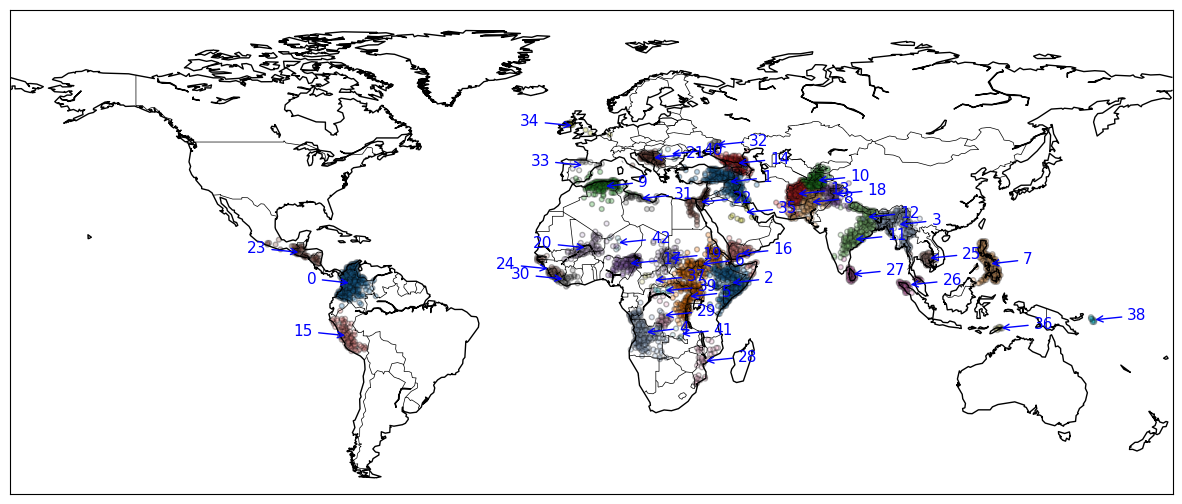

In [4]:
gc.contructYearsNetworks(event,neighbors,MAX_DISTANCE,timeWindow = timeWindow)
codnets.contructConsolidateYearNetwork(neighbors, MAX_DISTANCE, timeWindow = timeWindow)

Creating 8 workers processing  4  jobs
G:\Meu Drive\DaVo\COLABORA\ORE\Code3\public\net-All-Years\net-ALL-years_neighbors_3_MAX_DISTANCE_500_month_.gml
MaxDegree  87
Creating 8 workers processing  4  jobs
G:\Meu Drive\DaVo\COLABORA\ORE\Code3\public\net-All-Years\net-ALL-years_neighbors_3_MAX_DISTANCE_500_month_.gml
MaxDegree  87


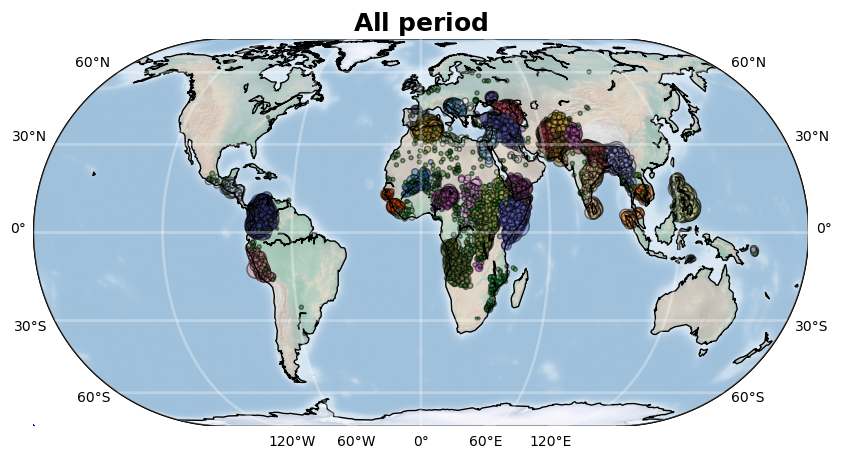

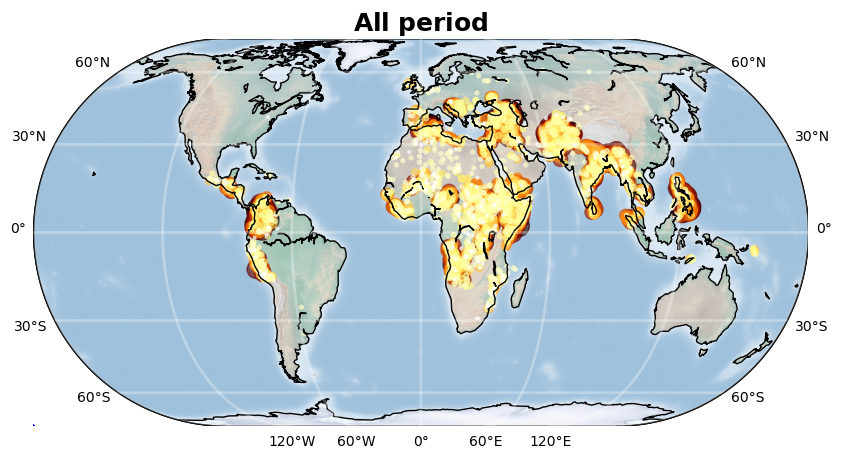

In [5]:
codnets.printYearsNetworksfromGmlFiles(neighbors=3,timeWindow=timeWindow,MAX_DISTANCE=MAX_DISTANCE)
codnets.printYearsNetworksfromGmlFiles(neighbors=3,timeWindow=timeWindow,MAX_DISTANCE=MAX_DISTANCE,Community=False)

In [6]:
commTS = communityTS()  #This is the codnet table of graph community time-series analyses
codnet_table = commTS.read_TableTSCells(timeWindow,MAX_DISTANCE,neighbors)

In [7]:
display(codnet_table)

gid  cLabel     n  n_norm_comm      m       <k>        <s>  \
0      138446       0  24.0     0.100000   38.0  3.166667   5.583333   
1      137007       0  24.0     0.100000   38.0  3.166667   5.583333   
2      144935       0  24.0     0.100000   38.0  3.166667   5.583333   
3      144934       0  24.0     0.100000   38.0  3.166667   5.583333   
4      137738       0  24.0     0.100000   38.0  3.166667   5.583333   
...       ...     ...   ...          ...    ...       ...        ...   
94349  172576       9  61.0     0.462121  189.0  6.196721  25.868852   
94350  166805       9  61.0     0.462121  189.0  6.196721  25.868852   
94351  172575       9  61.0     0.462121  189.0  6.196721  25.868852   
94352  171858       9  61.0     0.462121  189.0  6.196721  25.868852   
94353  173305       9  61.0     0.462121  189.0  6.196721  25.868852   

             lo     tmp_i      pre_i  tmp_mean_community  pre_mean_community  \
0      0.246537  27.44917  3881.5910           24.525613         2450.489188   
1      0.246537  25.95000  3881.5910           24.525613         2450.489188   
2      0.246537  25.91416  1292.0700           24.525613         2450.489188   
3      0.246537  24.61666  1292.0700           24.525613         2450.489188   
4      0.246537  26.13500  1942.5240           24.525613         2450.489188   
...         ...       ...        ...                 ...                 ...   
94349  0.272221  24.38417   396.0897           18.560438          357.534235   
94350  0.272221  26.64001   154.0747           18.560438          357.534235   
94351  0.272221  18.28666   317.6752           18.560438          357.534235   
94352  0.272221  20.78417   396.0897           18.560438          357.534235   
94353  0.272221  27.18917   488.7719           18.560438          357.534235   

       year  
0      1989  
1      1989  
2      1989  
3      1989  
4      1989  
...     ...  
94349  2011  
94350  2011  
94351  2011  
94352  2011  
94353  2011  

[94354 rows x 13 columns]

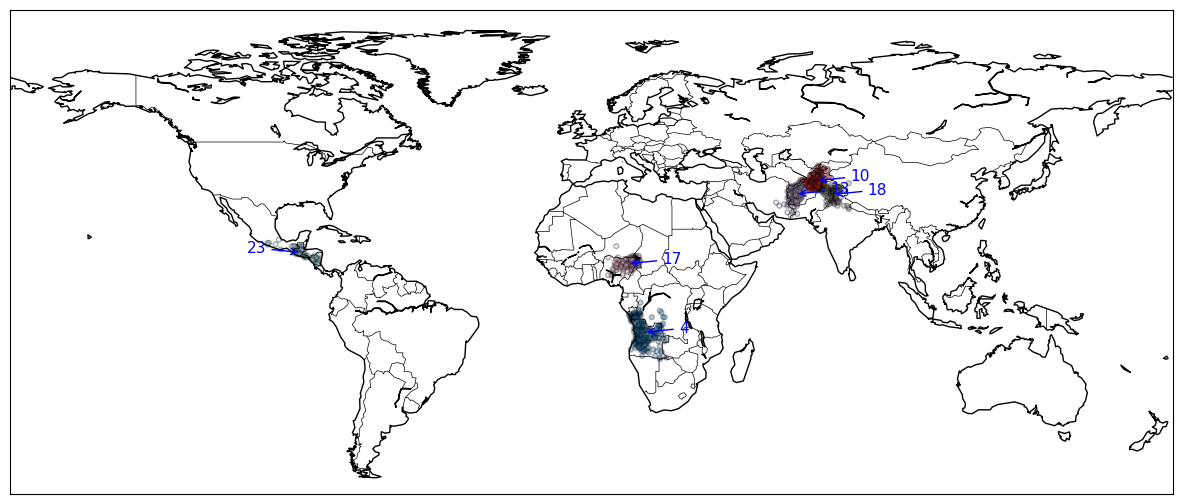

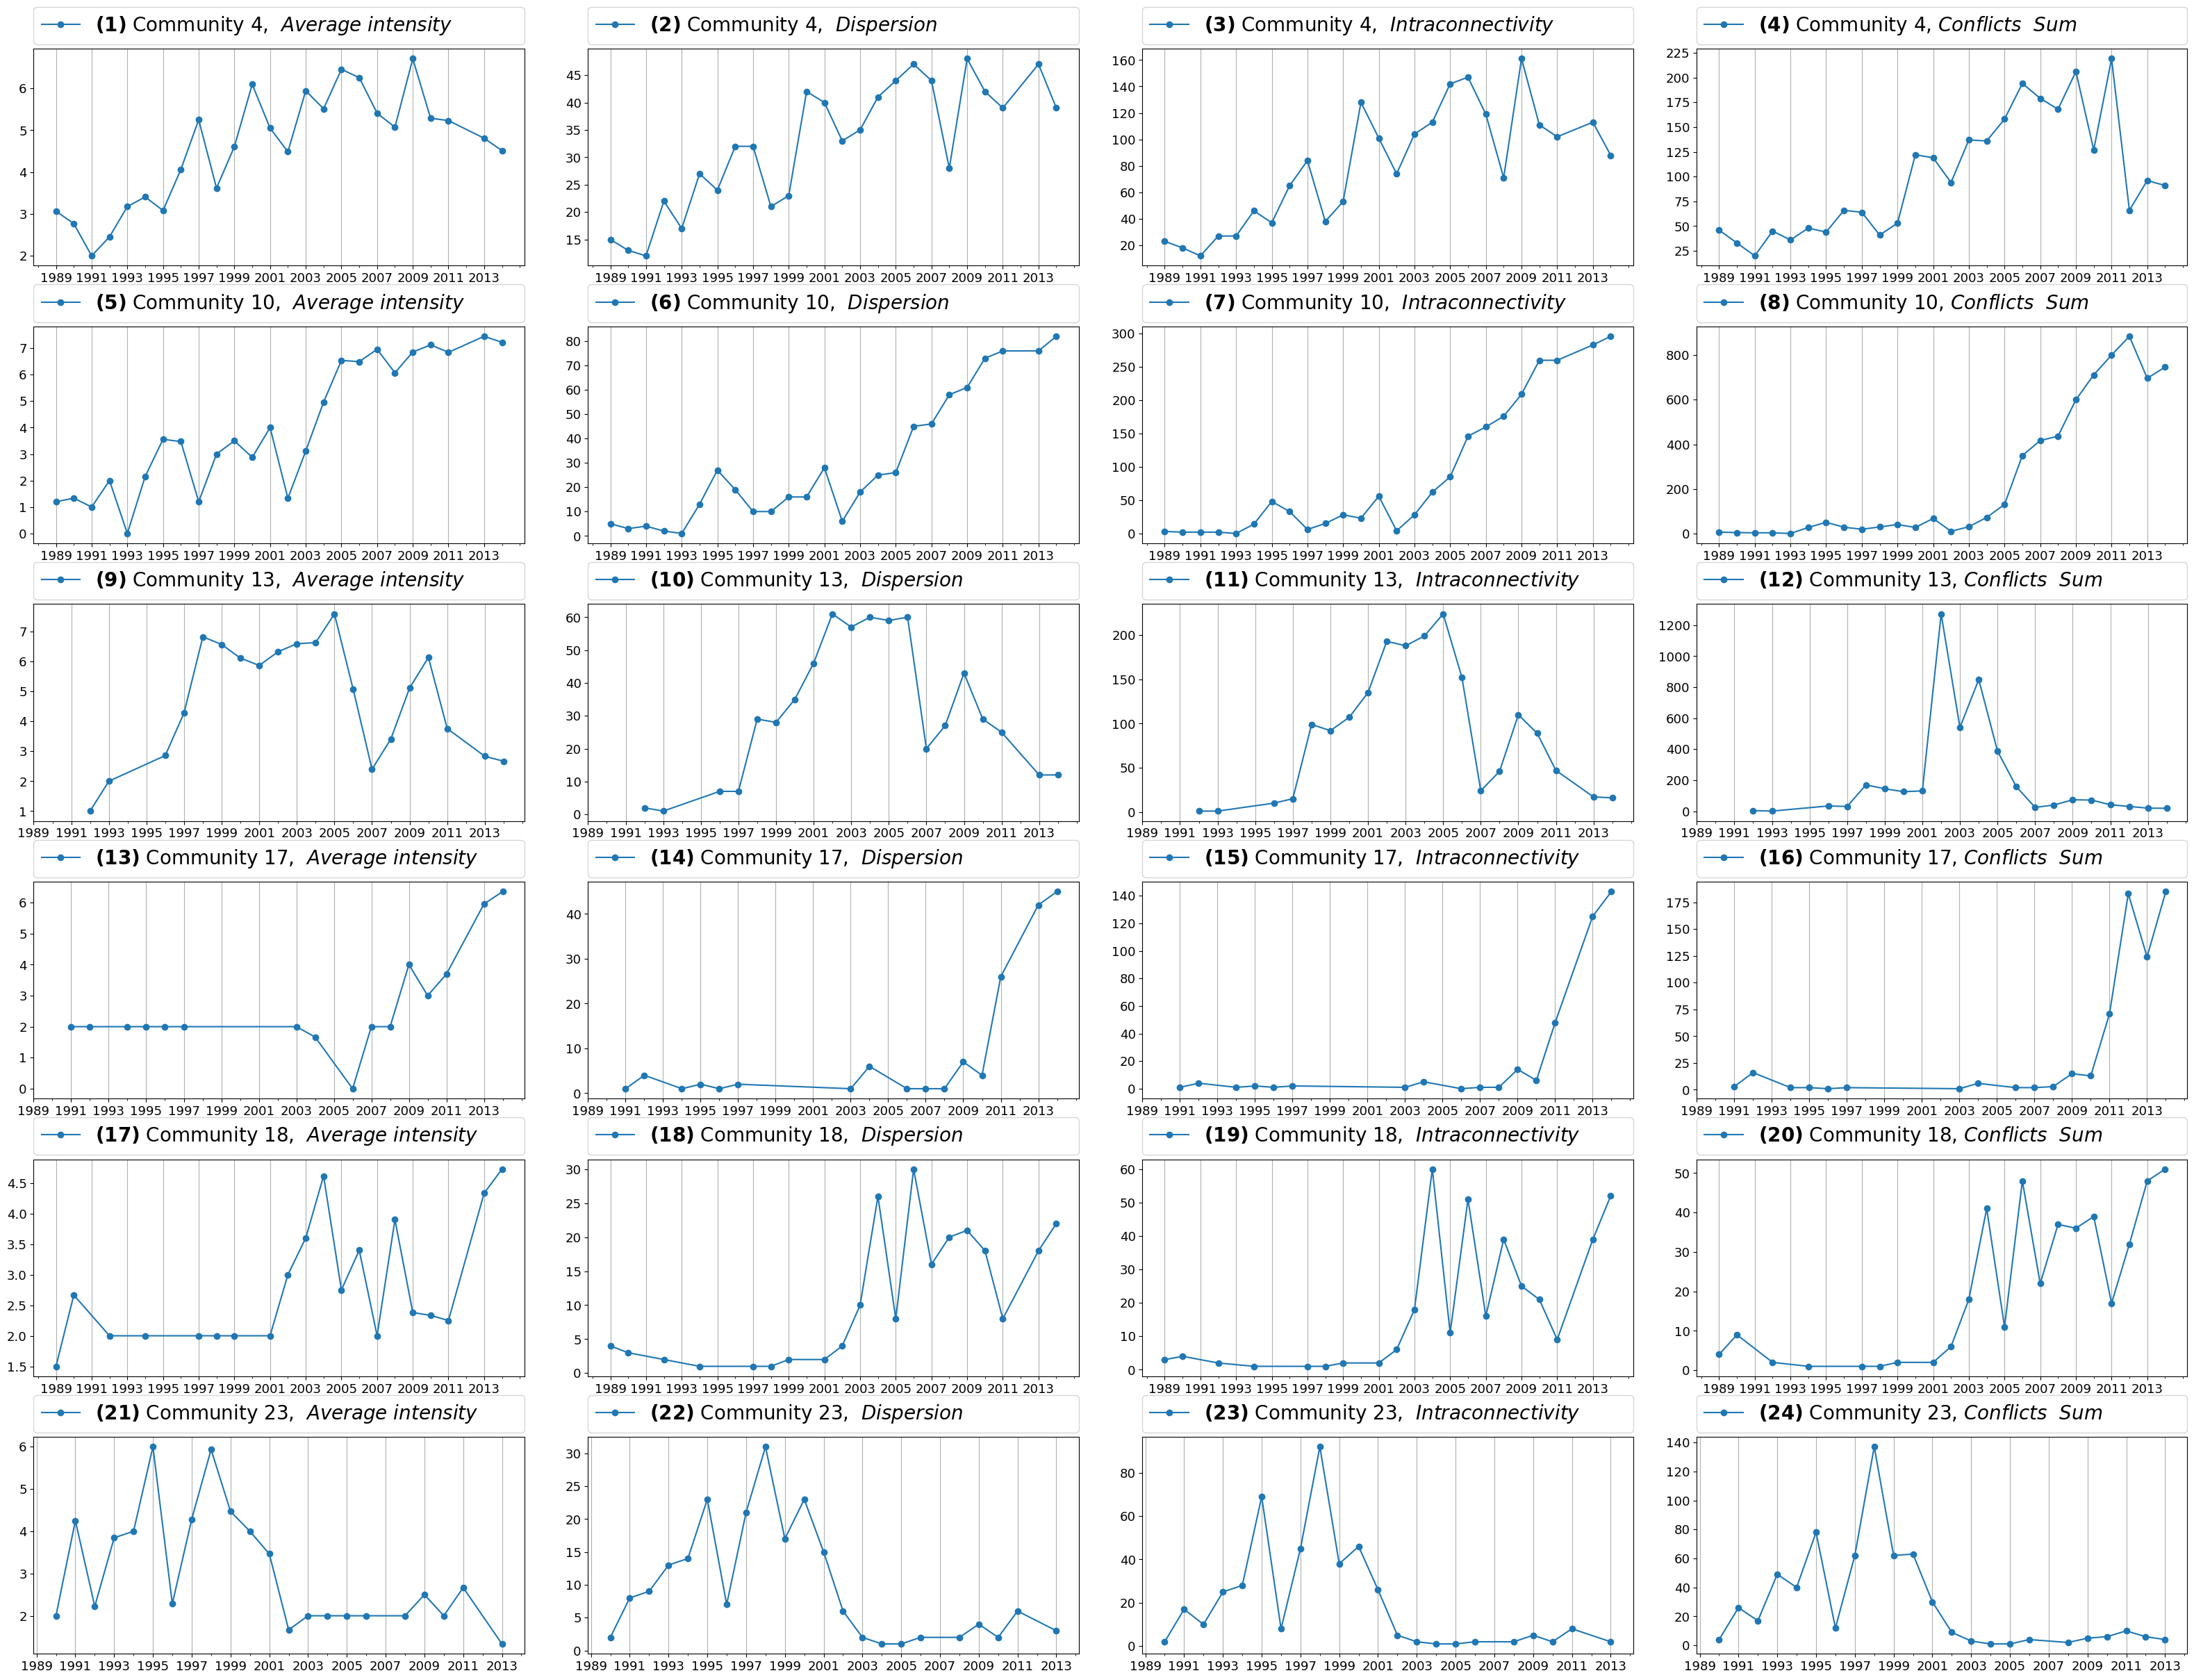

In [8]:
community_selection = [4,10,13,17,18,23]
fileGML = gc.getFileName(begin='net-ALL-years',neighbors=neighbors,
                               MAX_DISTANCE=MAX_DISTANCE, 
                               timeWindow=timeWindow, ext='gml',path=os.path.join(os.curdir, 'net-All-Years'))
 
G = nx.read_gml(fileGML) 
codnets.drawAllTimeCommunityGraph(Gy=G, figname="temp.png", min_comm_size=10, selection= community_selection)
commTS.draw_TSMapComunity(cols, timeWindow, MAX_DISTANCE, neighbors, community_selection)

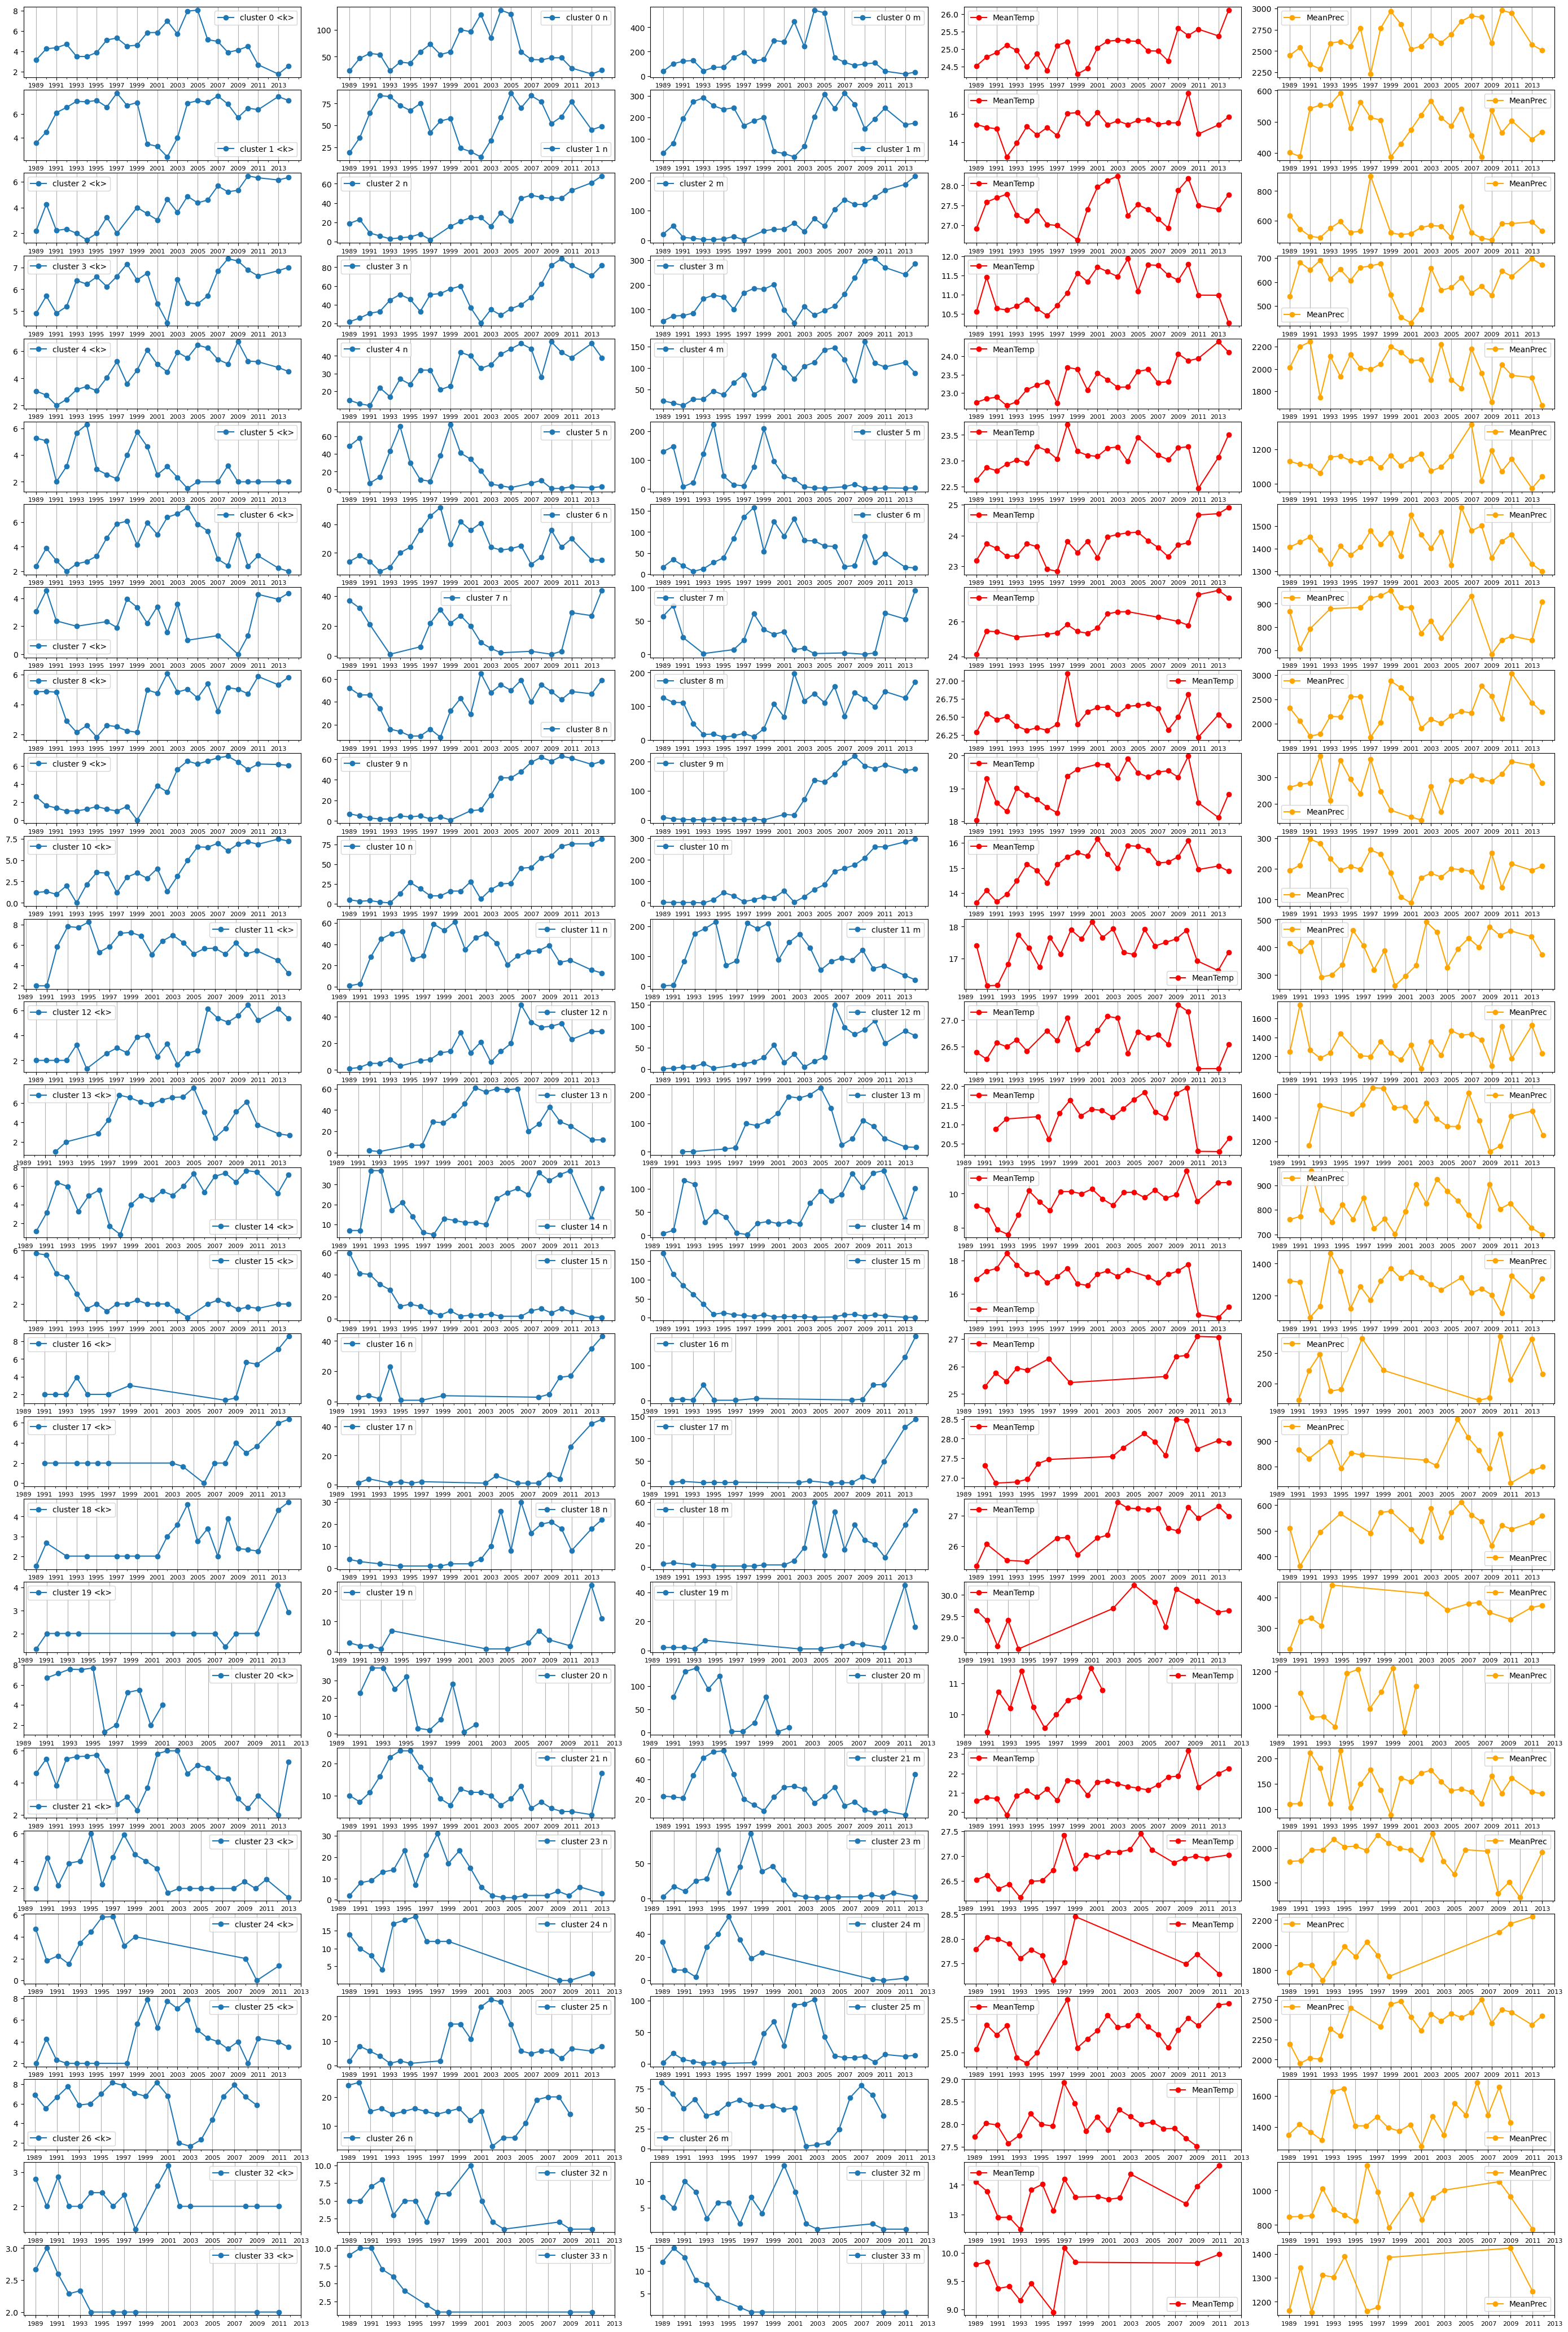

In [9]:
corrDf = commTS.drawTs(cols, timeWindow,MAX_DISTANCE,neighbors)

In [10]:
#"Pearson (T)":rT, 
#'Pearson p-value (T)':rpvT,
#'Spearman (T)':sT,
#'Spearman p-value (T)':spvT,
#'Pearson (P)':rP,
#'Pearson p-value (P)':rpvP,
#'Spearman (P)':sP,
#'Spearman p-value (P)':spvP
display(corrDf)                              

cLabel  size timeWindow  Distance  neighbors measure        rT      rpvT  \
0        0    25      month       500          3     <k> -0.106347  0.612891   
1        0    25      month       500          3       n -0.025214  0.904773   
2        0    25      month       500          3       m  0.026501  0.899936   
3        1    25      month       500          3     <k> -0.140377  0.503318   
4        1    25      month       500          3       n -0.298122  0.147770   
..     ...   ...        ...       ...        ...     ...       ...       ...   
79      32    17      month       500          3       n -0.275030  0.285350   
80      32    17      month       500          3       m -0.226075  0.382932   
81      33    11      month       500          3     <k>  0.004894  0.988607   
82      33    11      month       500          3       n -0.228749  0.498684   
83      33    11      month       500          3       m -0.142654  0.675637   

          sT      spvT        rP      rpvP        sP      spvP  
0  -0.057703  0.784104  0.013275  0.949784  0.094249  0.654068  
1  -0.030811  0.883763 -0.037229  0.859761  0.073946  0.725377  
2  -0.075784  0.718819 -0.038396  0.855410  0.080400  0.702432  
3  -0.168462  0.420842  0.137318  0.512756 -0.007692  0.970889  
4  -0.255868  0.217010  0.288571  0.161827  0.244325  0.239186  
..       ...       ...       ...       ...       ...       ...  
79 -0.295744  0.249109 -0.163956  0.529483 -0.088598  0.735256  
80 -0.286250  0.265343 -0.166783  0.522308 -0.111045  0.671352  
81 -0.188359  0.579136 -0.186579  0.582793 -0.282539  0.399891  
82 -0.419718  0.198750 -0.228845  0.498499 -0.317121  0.342000  
83 -0.390803  0.234678 -0.220663  0.514387 -0.283798  0.397702  

[84 rows x 14 columns]

Pearson correlation with all-period Codnet constructed with time window month, max.distance 500, neighbors 3
Significant communities (p-value < 0.05) with T:
	 Communties: [4, 10, 13, 18] for metric <k>
	 Communties: [4, 11, 13, 18, 21] for metric n
	 Communties: [4, 13, 18] for metric m


Spearman correlation with all-period Codnet constructed with time window month, max.distance 500, neighbors 3
Significant communities (p-value < 0.05) with T:
	 Communties: [4, 10, 13, 18] for metric <k>
	 Communties: [4, 10, 11, 13, 18, 21, 26] for metric n
	 Communties: [4, 10, 13, 18, 21] for metric m


Pearson correlation with all-period Codnet constructed with time window month, max.distance 500, neighbors 3
Significant communities (p-value < 0.05) with P:
	 Communties: [17] for metric <k>
	 Communties: [17, 23] for metric n
	 Communties: [11, 23] for metric m


Spearman correlation with all-period Codnet constructed with time window month, max.distance 500, neighbors 3
Significant communities (

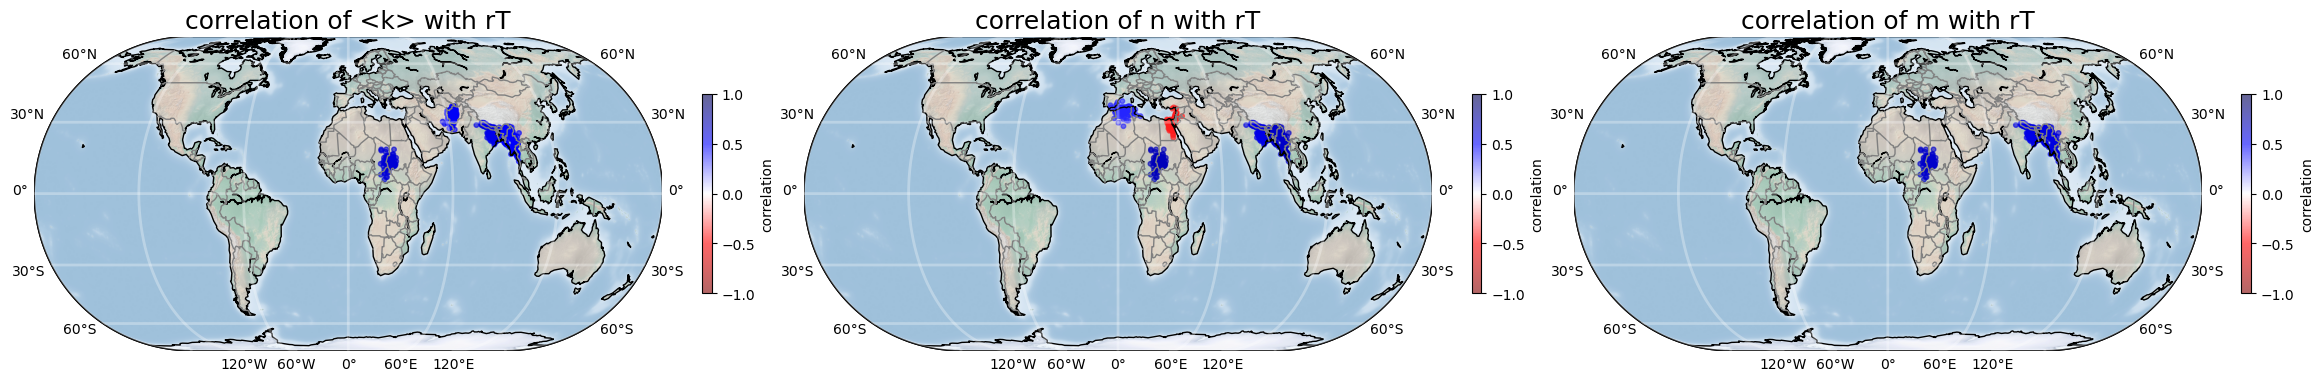

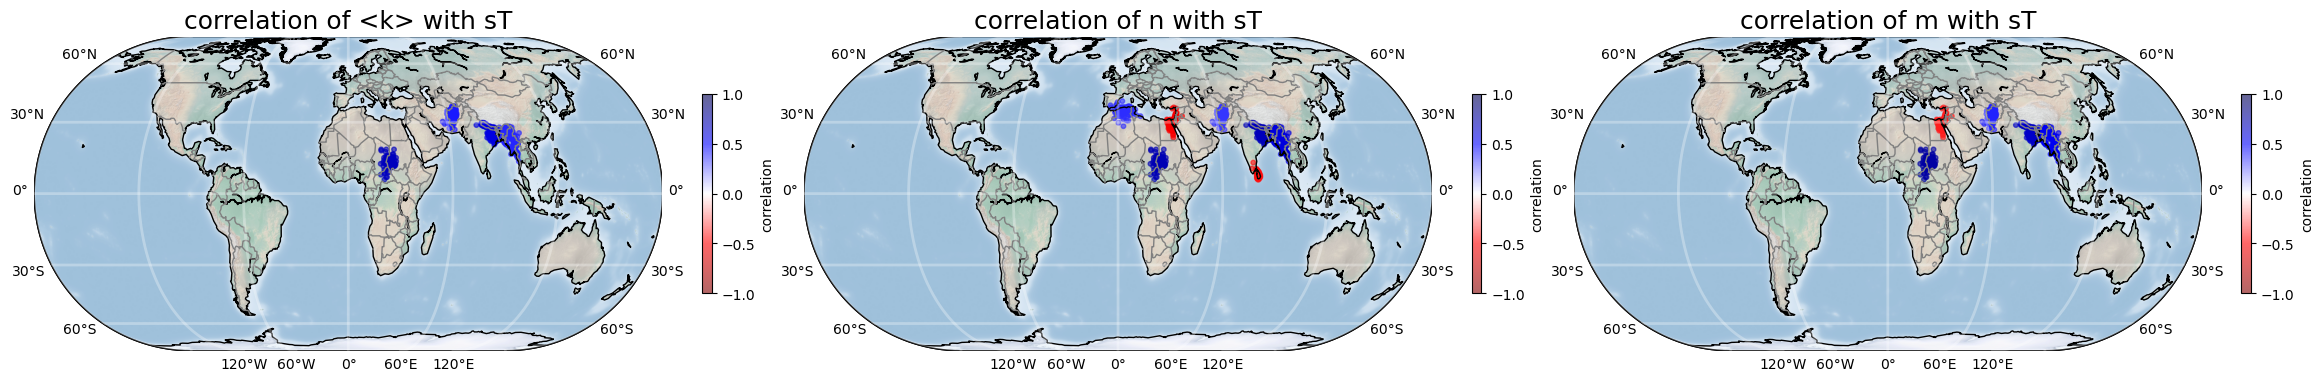

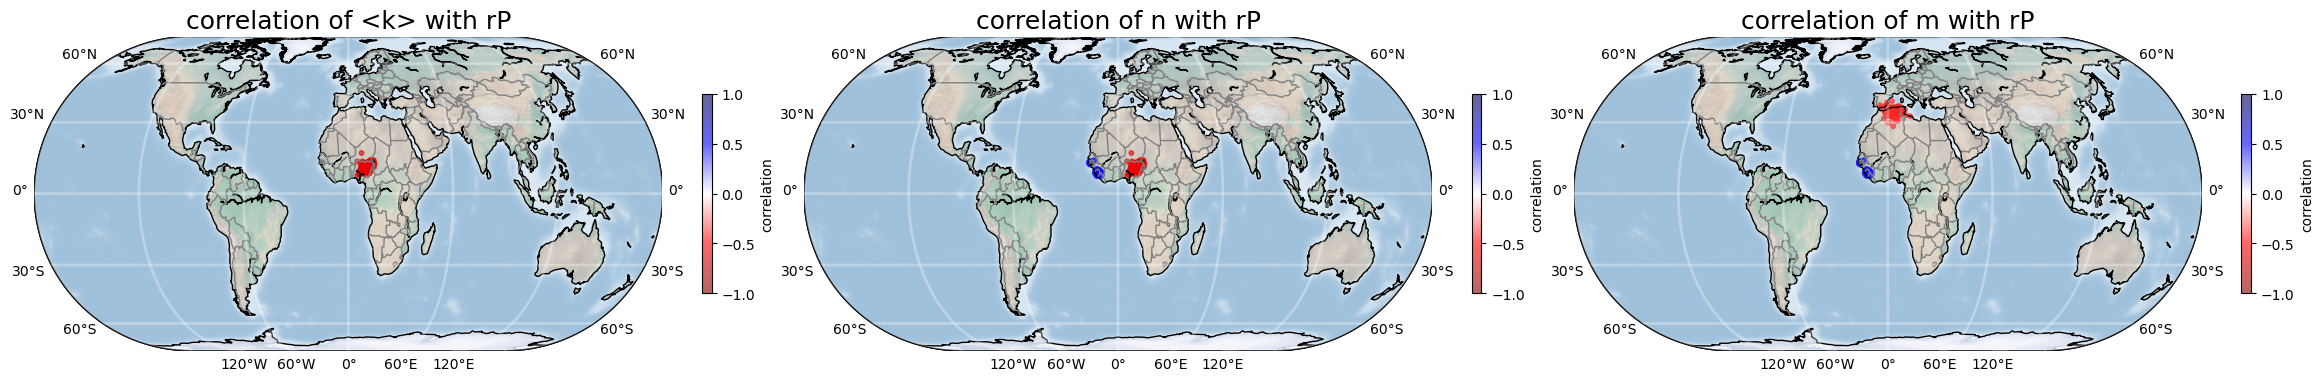

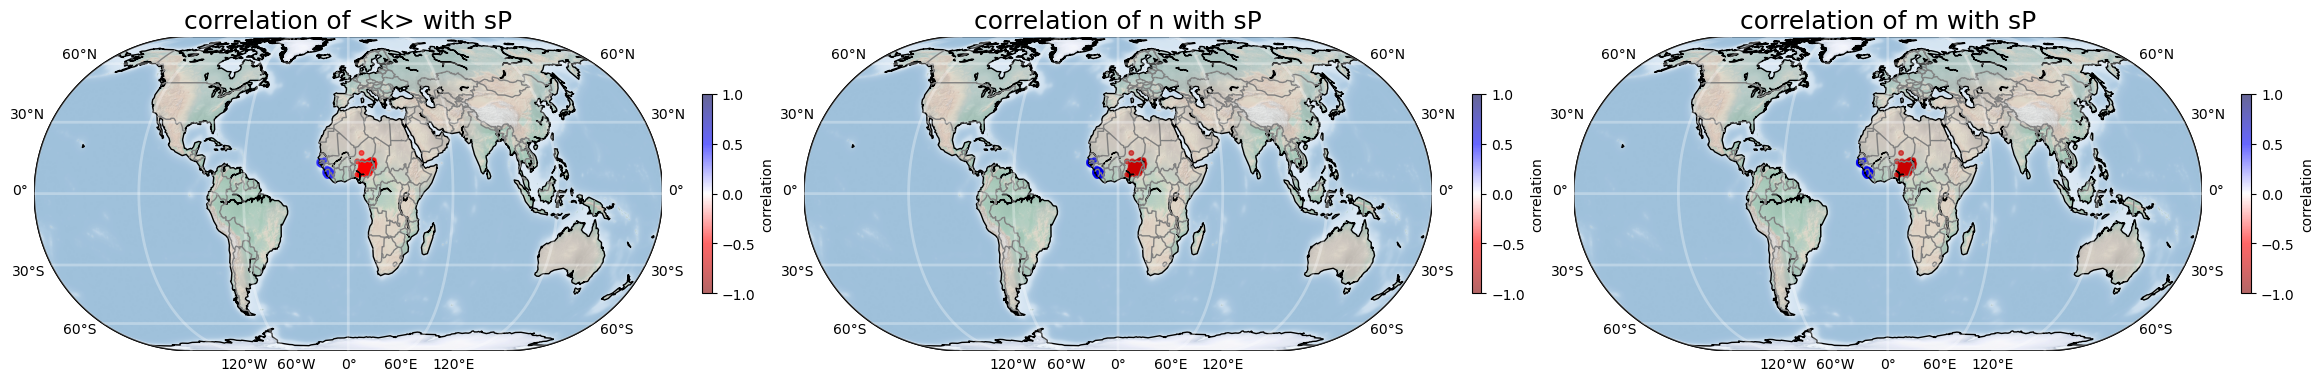

In [11]:
# corr_measure: "r" for Parson and "s" for Spearman
# climate_measure: 'T' for temperature and 'P' for precipitation
commTS.draw_TSMap(corrDf, corr_measure="r", climate_measure='T')
commTS.draw_TSMap(corrDf, corr_measure="s", climate_measure='T')
commTS.draw_TSMap(corrDf, corr_measure="r", climate_measure='P')
commTS.draw_TSMap(corrDf, corr_measure="s", climate_measure='P')

# References
You can use this code as it is for academic purpose. If you found it useful for your research, we appreciate your reference to our work _Measuring Spatiotemporal Civil War Dimensions Using Community-Based Dynamic Network Representation (CoDNet)_.

More information, supplemental material, original dataset, and the ungated version of the article, you can find it in https://www.orekoren.com/publications

[1] Vega-Oliveros, D. and Koren, O., "Measuring Spatiotemporal Civil War Dimensions Using Community-Based Dynamic Network Representation (CoDNet)" in IEEE Transactions on Computational Social Systems, vol. 11, no. 1, pp. 1506-1516, Feb. 2024. https://doi.org/10.1109/TCSS.2023.3241173.